## OBJECTIVE

This is a tutorial meant to introduce you to PyTorch, a python package that provides two high-level features:
1. A replacement for numpy to use the power of GPUs
2. A deep learning research platform that provides maximum flexibility and speed  

According to the [docs](http://pytorch.org/about/):
>**[DYNAMIC NEURAL NETWORKS]**  
>"PyTorch has a unique way of building neural networks: using and replaying a tape recorder."
>
>"Most frameworks such as TensorFlow, Theano, Caffe and CNTK have a static view of the world. One has to build a neural network, and reuse the same structure again and again. Changing the way the network behaves means that one has to start from scratch."
>
>"With PyTorch, we use a technique called Reverse-mode auto-differentiation, which allows you to change the way your network behaves arbitrarily with zero lag or overhead. Our inspiration comes from several research papers on this topic, as well as current and past work such as autograd, autograd, Chainer, etc."
>
>"While this technique is not unique to PyTorch, it’s one of the fastest implementations of it to date. You get the best of speed and flexibility for your crazy research."
>
> 
>**[NATIVE TO PYTHON]**  
>"PyTorch is not a Python binding into a monolothic C++ framework. It is built to be deeply integrated into Python. You can use it naturally like you would use numpy / scipy / scikit-learn etc. You can write your new neural network layers in Python itself, using your favorite libraries and use packages such as Cython and Numba. Our goal is to not reinvent the wheel where appropriate."
>
>**[EASY TO USE]**  
>"PyTorch is designed to be intuitive, linear in thought and easy to use. When you execute a line of code, it gets executed. There isn’t an asynchronous view of the world. When you drop into a debugger, or receive error messages and stack traces, understanding them is straight-forward. The stack-trace points to exactly where your code was defined. We hope you never spend hours debugging your code because of bad stack traces or asynchronous and opaque execution engines."
>
>**[FAST]**  
>"PyTorch has minimal framework overhead. We integrate acceleration libraries such as Intel MKL and NVIDIA (CuDNN, NCCL) to maximize speed. At the core, it’s CPU and GPU Tensor and Neural Network backends (TH, THC, THNN, THCUNN) are written as independent libraries with a C99 API."
>
>"They are mature and have been tested for years."
>
>"Hence, PyTorch is quite fast – whether you run small or large neural networks."
>
>**[LEAN]**  
>"The memory usage in PyTorch is extremely efficient compared to Torch or some of the alternatives. We’ve written custom memory allocators for the GPU to make sure that your deep learning models are maximally memory efficient. This enables you to train bigger deep learning models than before."

To get you acclimated with the basics of this framework, we'll walkthrough an example using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist). 

My hope is that you see how powerful and how easy PyTorch is to use and that you'll take what you've learned here today and apply it to your own deep learning problems.

## WHY FASHION-MNIST?

Most, if not all, of us are familiar with **MNIST**. It's an aggregation of thousands of handwritten digits. It's usually the first dataset you encounter when dipping your toes into machine learning - sort of like the Hello World of machine learning. It's a great introductory dataset. 

It looks like this:
![MNIST](http://andrew.gibiansky.com/blog/machine-learning/k-nearest-neighbors-simplest-machine-learning/images/mnist-example-ipy.png)


You may also be familiar with **CIFAR-10**. It too is a carefully curated aggregation that includes thousands of images comprising 10 categories. 

It looks like this:
![CIFAR](http://karpathy.github.io/assets/cifar_preview.png)

So why didn't I use MNIST or CIFAR-10? In a few words: because it's been done...a lot. So instead of subjecting you to yet another tutorial centered on these canonical datasets, I decided to switch it up. To show you something a little different, in the hopes that it'll be not only more interesting, but also more challenging.  

## ENTER FASHION-MNIST

Fashion-MNIST is a dataset of [Zalando's](https://jobs.zalando.com/tech/) article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is meant to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

|LABEL|DESCRIPTION|
|--|--|
|0|T-Shirt|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle Boot|

Here's an example how the data looks (each class takes three-rows):  
![FMNIST](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

---

## PyTorch Tutorial

Now that we know a bit about our dataset, let's learn some PyTorch!

### Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torch.utils.data as data_utils
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### Functions

In [2]:
def load_fmnist(path, kind='train'):
    # attribution: https://github.com/zalandaoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
    '''function that returns images and labels separately in a numpy ndarray'''
    import os
    import gzip
    
    """Load MNIST data from path"""
    labels_path = os.path.join(path,
                              '%s-labels-idx1-ubyte.gz'
                              % kind)
    images_path = os.path.join(path,
                              '%s-images-idx3-ubyte.gz'
                              % kind)
    
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                              offset=8)
        
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                              offset=16).reshape(len(labels), 784)
        
    return images, labels

In [3]:
def standardize(ndarray):
    '''standardize data with mean 0 and std 1'''
    return (ndarray - ndarray.mean()) / np.sqrt(ndarray.var() + 1e-5)

In [4]:
def imshow(img):
    '''convert tensor to display image'''
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

### Load Data

In [5]:
# set the path to your Fashion-MNIST data
mypath = '/Users/davidziganto/Data_Science/Workshops/PyTorch/MHacksX/data'

In [6]:
X_train, y_train = load_fmnist(path=mypath, kind='train')
X_test, y_test = load_fmnist(path=mypath, kind='t10k')

### Check Type, Dimensions, & Values

In [7]:
# check type of our data
type(X_train)

numpy.ndarray

In [8]:
print('Dimensions\n---')
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

Dimensions
---
X_train (60000, 784)
X_test (10000, 784)
y_train (60000,)
y_test (10000,)


In [9]:
stats = [np.min, np.max, np.mean, np.std]
for stat in stats:
    print(str(stat), stat(X_train))
    print(str(stat), stat(X_test))

<function amin at 0x10e358268> 0
<function amin at 0x10e358268> 0
<function amax at 0x10e3581e0> 255
<function amax at 0x10e3581e0> 255
<function mean at 0x10e358730> 72.9403522321
<function mean at 0x10e358730> 73.1465665816
<function std at 0x10e3587b8> 90.0211823513
<function std at 0x10e3587b8> 89.8732590781


### Preprocess Data

In [10]:
# standardize data (needed for SGD)
X_train = standardize(X_train)
X_test = standardize(X_test)

In [11]:
# check stats
for stat in stats:
    print(str(stat), stat(X_train))
    print(str(stat), stat(X_test))

<function amin at 0x10e358268> -0.810257655831
<function amin at 0x10e358268> -0.813885768544
<function amax at 0x10e3581e0> 2.02240898087
<function amax at 0x10e3581e0> 2.02344318178
<function mean at 0x10e358730> -1.30314504463e-17
<function mean at 0x10e358730> -8.77882800468e-17
<function std at 0x10e3587b8> 0.999999999383
<function std at 0x10e3587b8> 0.999999999381


In [12]:
# reshape numpy arrays
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

In [13]:
print('Dimensions\n---')
print('X_train', X_train.shape)
print('X_test', X_test.shape)

Dimensions
---
X_train (60000, 1, 28, 28)
X_test (10000, 1, 28, 28)


In [14]:
# convert numpy ndarray --> torch tensor
X_train = torch.from_numpy(X_train).float()  ## have to add .float() here  
X_test = torch.from_numpy(X_test).float()    ## otherwise ByteTensor which won't work
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [15]:
type(X_train)

torch.FloatTensor

### Create Train & Test Datasets

In [16]:
train = data_utils.TensorDataset(X_train, y_train)
test = data_utils.TensorDataset(X_test, y_test)

train_loader = data_utils.DataLoader(train, batch_size=4, shuffle=True, num_workers=2)
test_loader = data_utils.DataLoader(test, batch_size=4, shuffle=True, num_workers=2)

classes = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']

In [17]:
type(train)

torch.utils.data.dataset.TensorDataset

### View Sample Images

coat coat ankle-boot trouser


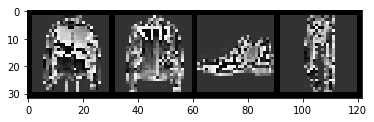

In [18]:
# get random training images
trainiter = iter(train_loader)
images, labels = next(trainiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
# print labels
print(' '.join('%s' % classes[labels[i]] for i in range(4)))

### Convolutional Neural Network

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)  ## (nb inputs, nb filters, kernel size)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  ## reshape for fully connected layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

In [20]:
# instantiate model
cnn = CNN()

In [21]:
# see architecture
print(cnn)

CNN (
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (fc1): Linear (320 -> 50)
  (fc2): Linear (50 -> 10)
)


### Define Loss Function & Optimizer

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

### Train Model

In [23]:
nb_epochs = 3
minibatches = 5000

for epoch in range(nb_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data  ## separate input data and labels
        inputs, labels = Variable(inputs), Variable(labels)  ## wrap in Variable for GD
        # zero parameter gradients, else accumulate
        optimizer.zero_grad()
        # forward prop
        outputs = cnn(inputs)
        # calculate loss
        loss = criterion(outputs, labels)
        # backprop
        loss.backward()
        # update weights
        optimizer.step()
        
        # print running loss
        running_loss += loss.data[0]
        if i%minibatches == minibatches-1:
            # print every 5,000 minibatches or whatever you set 'minibatches' equal to
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/minibatches))
            running_loss = 0.0
            
print('Training Complete!')

[1,  5000] loss: 0.892
[1, 10000] loss: 0.447
[1, 15000] loss: 0.390
[2,  5000] loss: 0.351
[2, 10000] loss: 0.346
[2, 15000] loss: 0.337
[3,  5000] loss: 0.308
[3, 10000] loss: 0.307
[3, 15000] loss: 0.303
Training Complete!


### How'd We Do?

In [24]:
testiter = iter(test_loader)
test_images, test_labels = next(testiter)

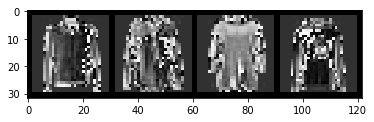

In [25]:
imshow(torchvision.utils.make_grid(test_images))

In [26]:
print('Ground Truth:', ' '.join('%s' % classes[test_labels[i]] for i in range(4)))

Ground Truth: coat shirt pullover pullover


In [27]:
guess = torch.max(cnn(Variable(test_images)), 1)[1].data
guess


 4
 6
 6
 2
[torch.LongTensor of size 4]

In [28]:
print('CNN Guess:', ' '.join('%s' % classes[guess[i]] for i in range(4)))

CNN Guess: coat shirt shirt pullover


### Total Accuracy & Accuracy By Class

In [29]:
correct = 0
total = 0

correct_class = list(0. for i in range(10))
total_class = list(0. for i in range(10))

for data in test_loader:
    images, labels = data
    outputs = cnn(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        correct_class[label] += c[i]
        total_class[label] += 1
    
print('Accuracy on the %d test images is %d%%\n' % (total, (100*correct/total)))

for i in range(10):
    print('Accuracy of %s: %2d%%' % (classes[i], 100*correct_class[i]/total_class[i]))

Accuracy on the 10000 test images is 88%

Accuracy of t-shirt: 79%
Accuracy of trouser: 95%
Accuracy of pullover: 87%
Accuracy of dress: 89%
Accuracy of coat: 78%
Accuracy of sandal: 93%
Accuracy of shirt: 68%
Accuracy of sneaker: 97%
Accuracy of bag: 97%
Accuracy of ankle-boot: 95%


# To Do...

Show how to go from conv to fc (how to get 320?)